In [1]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely
!pip install chart-studio

In [2]:
import plotly.figure_factory as ff
import geopandas as gp
import numpy as np
import pandas as pd
import plotly.offline as py
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot

In [3]:
# https://chart-studio.plotly.com/~jackp/18292/plotting-d3js-county-choropleth-maps-in/#/
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

In [4]:
# Created Pandas DataFrame to rename (ZCTA5CE10 as Zipcode)

df_pd = pd.DataFrame(df)
df_pd = df_pd.rename(columns={"ZCTA5CE10":"Zipcode"})

In [5]:
# Converted df Zipcode column to int

df_pd["Zipcode"] = df_pd["Zipcode"].astype(int)

In [6]:
# Saving a CSV file named "california_census_data"

california_data = pd.read_csv("Resources/california_census_data.csv")

In [7]:
# Converted df Zipcode column to int

california_data["Zipcode"] = california_data["Zipcode"].astype(int)

In [8]:
# Merged df_pd and california_pd by "Zipcode"

california_merged = pd.merge(df_pd, california_data, how="inner", on="Zipcode")

In [33]:
# California City lives 100% in poverty

# max(california_merged['Poverty Rate'])
# california_merged[california_merged['Poverty Rate']==100]

In [9]:
california_geodata = gp.GeoDataFrame(california_merged, geometry='geometry')

<IPython.core.display.Javascript object>


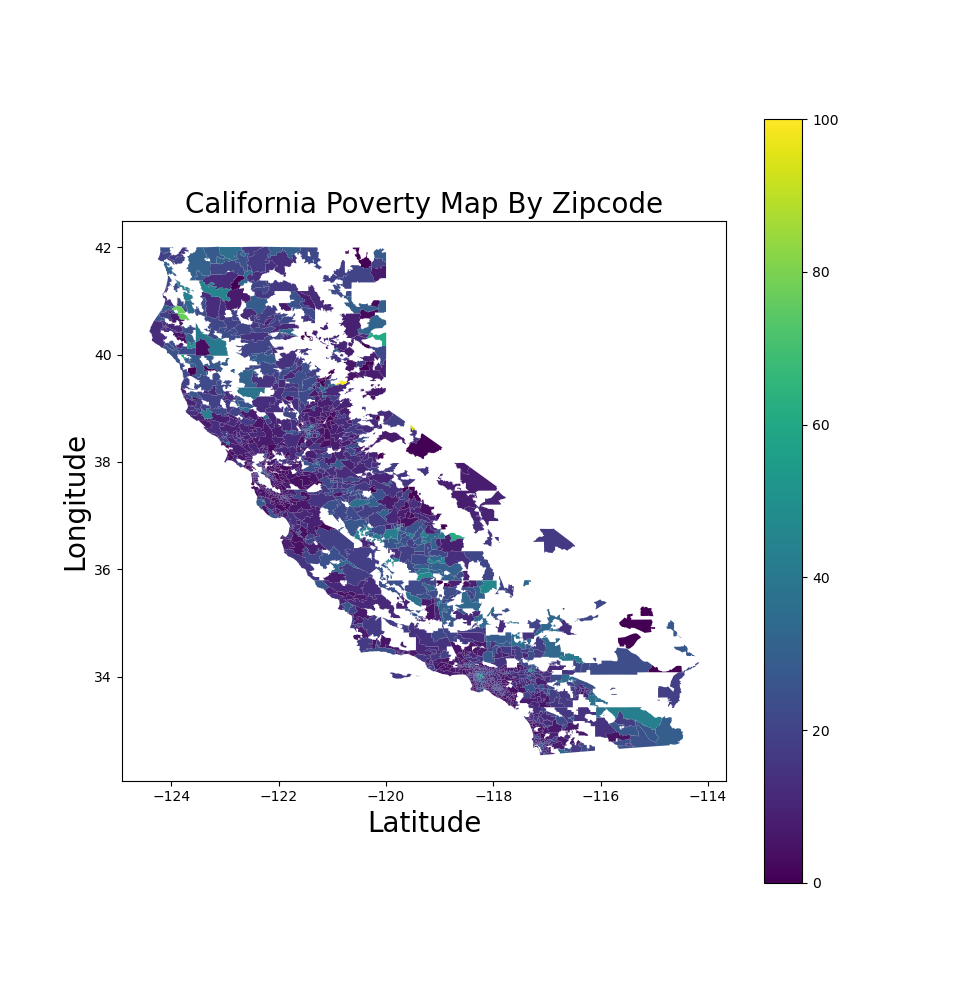

In [35]:
# df_poverty_plot = california_geodata[["Poverty Rate","geometry"]]
%matplotlib notebook
import matplotlib.pyplot as plt

california_geodata.plot(figsize=(10,10), column='Poverty Rate', legend=True);
plt.title("California Poverty Map By Zipcode", fontsize=20);
plt.xlabel("Latitude", fontsize=20);
plt.ylabel("Longitude", fontsize=20)

plt.savefig("Choropleth Map By Zipcode")

In [50]:
california_merged.columns

Index(['Zipcode', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10', 'geometry',
       'Population', 'Poverty Count', 'poverty_male', 'poverty_female',
       'poverty_white_alone', 'poverty_black_alone',
       'population_american_indian_alone', 'poverty_asian_alone',
       'poverty_native_hawaiian_alone', 'poverty_two_or_more_races',
       'poverty_hispanic_origin', 'poverty_family',
       'poverty_family_single_male', 'poverty_family_single_female',
       'employment_labor_force', 'employment_not_labor_force',
       'employment_employed', 'employment_unemployed', 'Poverty Rate', 'index',
       'City', 'County', 'Type'],
      dtype='object')

<IPython.core.display.Javascript object>


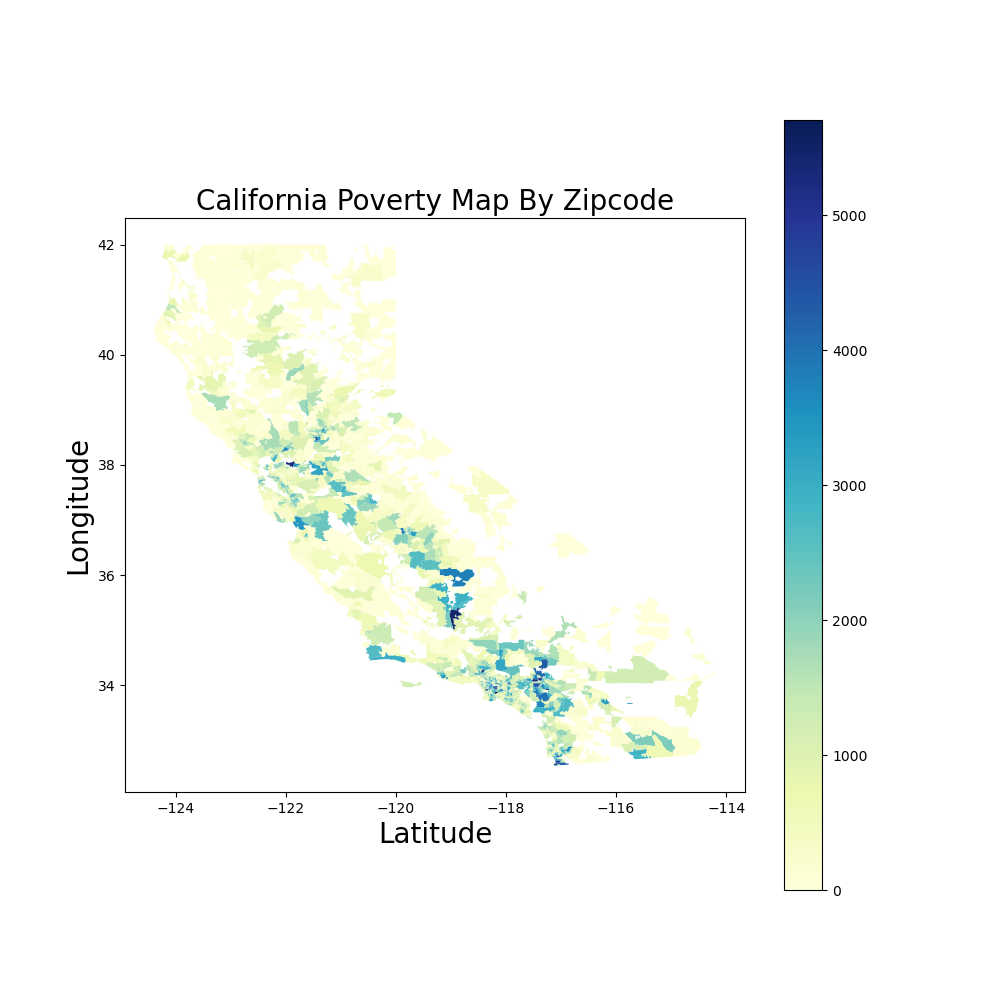

In [51]:
california_geodata.plot(figsize=(10,10), column='employment_unemployed', legend=True, cmap='YlGnBu');
plt.title("California Poverty Map By Zipcode", fontsize=20);
plt.xlabel("Latitude", fontsize=20);
plt.ylabel("Longitude", fontsize=20)

plt.savefig("Choropleth Map By Zipcode")

# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

<IPython.core.display.Javascript object>


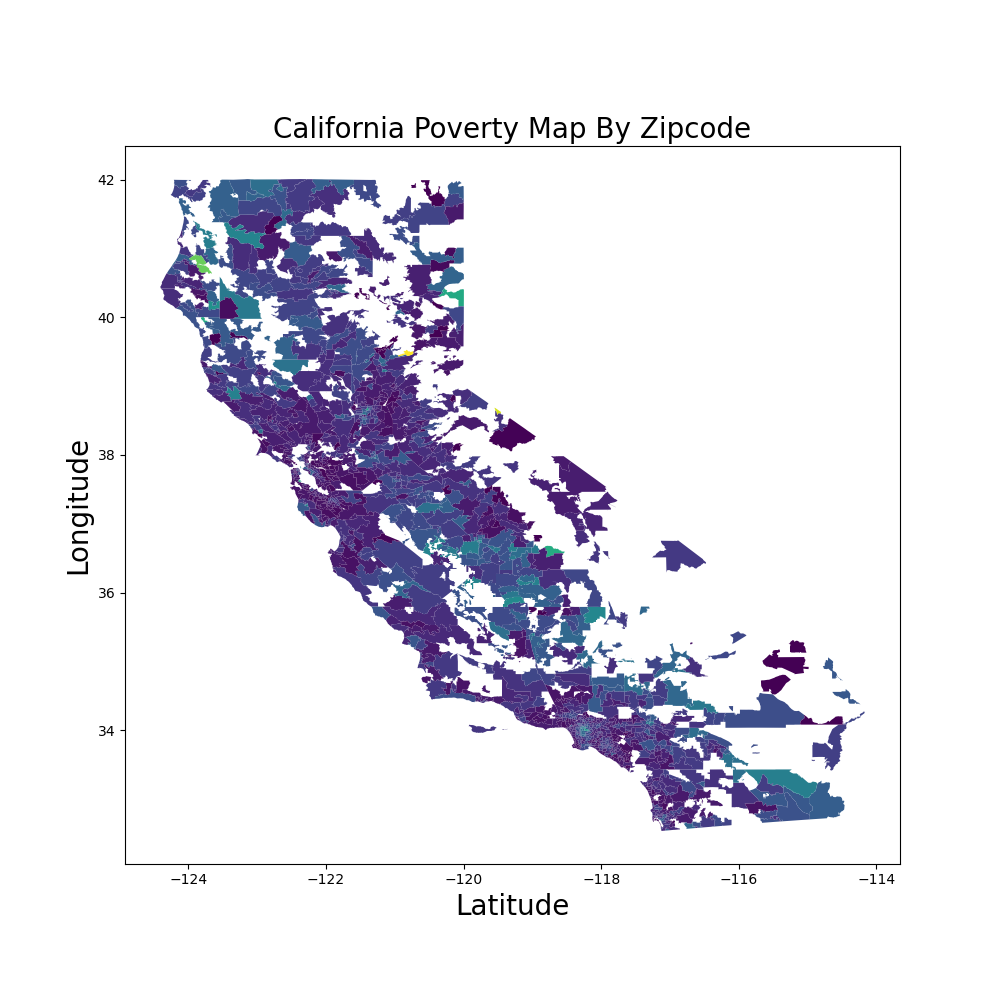

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

# import mpld3
# mpld3.enable_notebook()
# plt.rcParams['figure.figsize'] = [10,10]

df_poverty_plot.plot(figsize=(10,10), column='Poverty Rate');
plt.title("California Poverty Map By Zipcode", fontsize=20);
plt.xlabel("Latitude", fontsize=20);
plt.ylabel("Longitude", fontsize=20);

plt.savefig("Choropleth Map By Zipcode")

In [15]:
# Saving a CSV file named "california_merged_data"

california_merged.to_csv("Resources/california_merged_data.csv", encoding="utf-8", index=False)

In [16]:
import plotly.figure_factory as ff
import geopandas as gp
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

# import numpy as np
# import pandas as pd

df_f = gp.read_file('Resources/california_census_data.csv')

In [17]:
# Problem - Geometry coordinates were knocked off

df_f.head(20)

,Population,Poverty Count,poverty_male,poverty_female,poverty_white_alone,poverty_black_alone,population_american_indian_alone,poverty_asian_alone,poverty_native_hawaiian_alone,poverty_two_or_more_races,...,employment_not_labor_force,employment_employed,employment_unemployed,Zipcode,Poverty Rate,index,City,County,Type,geometry
0,58738.0,18654.0,8736.0,9918.0,5512.0,1982.0,57.0,24.0,0.0,182.0,...,16142.0,23182.0,2922.0,90001,31.757976097245393,1,Los Angeles,Los Angeles,Standard,None
1,52856.0,17795.0,7735.0,10060.0,6049.0,3905.0,270.0,110.0,0.0,249.0,...,16206.0,18957.0,2660.0,90002,33.666944150143784,2,Los Angeles,Los Angeles,Standard,None
2,70490.0,23212.0,10498.0,12714.0,5133.0,6757.0,241.0,28.0,0.0,253.0,...,19607.0,26755.0,3835.0,90003,32.92949354518371,3,Los Angeles,Los Angeles,Standard,None
3,62733.0,11985.0,5475.0,6510.0,5027.0,643.0,34.0,2403.0,0.0,225.0,...,15009.0,34265.0,2624.0,90004,19.10477738989049,4,Los Angeles,Los Angeles,Standard,None
4,39562.0,11300.0,4979.0,6321.0,2302.0,815.0,44.0,2798.0,0.0,131.0,...,9063.0,21430.0,2040.0,90005,28.562762246600272,5,Los Angeles,Los Angeles,Standard,None
5,62329.0,17720.0,8223.0,9497.0,5404.0,603.0,270.0,1933.0,9.0,271.0,...,14334.0,31431.0,3413.0,90006,28.429783888719538,6,Los Angeles,Los Angeles,Standard,None
6,41221.0,16513.0,7917.0,8596.0,4486.0,1731.0,85.0,4717.0,127.0,485.0,...,16933.0,16373.0,2426.0,90007,40.059678319303266,7,Los Angeles,Los Angeles,Standard,None
7,32359.0,7207.0,2945.0,4262.0,1492.0,4755.0,0.0,177.0,35.0,160.0,...,10795.0,14512.0,1792.0,90008,22.272010877962853,8,Los Angeles,Los Angeles,Standard,None
8,3759.0,535.0,283.0,252.0,51.0,15.0,0.0,398.0,0.0,10.0,...,1285.0,2084.0,179.0,90010,14.232508645916468,10,Los Angeles,Los Angeles,Standard,None
9,108051.0,38839.0,17507.0,21332.0,14461.0,3584.0,344.0,121.0,16.0,218.0,...,28309.0,44628.0,3954.0,90011,35.94506297951893,11,Los Angeles,Los Angeles,Standard,None


In [18]:
type(df_f["geometry"])

geopandas.geoseries.GeoSeries

In [19]:
df_f['geometry']

# df_f["Zipcode"]['90242']

0       None
1       None
2       None
3       None
4       None
        ... 
1546    None
1547    None
1548    None
1549    None
1550    None
Name: geometry, Length: 1551, dtype: object

In [20]:
type(df_f)

geopandas.geodataframe.GeoDataFrame

In [21]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

# df_sample = pd.read_shp('cb_2018_us_zcta510_500k.shp')
# df_sample_r = df_sample[df_sample['STNAME'] == 'California']

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# endpts = list(np.mgrid[min(values):max(values):4j])
# colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
#     legend_title='Population by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     exponent_format=True,
# )
# fig.layout.template = None
# fig.show()

In [22]:
# colorscale = [
#     'rgb(193, 193, 193)',
#     'rgb(239,239,239)',
#     'rgb(195, 196, 222)',
#     'rgb(144,148,194)',
#     'rgb(101,104,168)',
#     'rgb(65, 53, 132)']

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# endpts = list(np.mgrid[min(values):max(values):4j])
# colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
#     legend_title='Population by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     exponent_format=True,
# )
# fig.layout.template = None
# fig.show()